# Exercises on Frequent Subgraph Mining

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 1 - DFS codes
### Part A:

Consider the graph illustrated in Figure 1 and its DFS traversal:

<div style="margin: 0 auto; padding: 1em; text-align: center; max-width: 500px;">
    <img src="graphics/graph_dfs.jpg" />
    <p><b>Figure 1:</b> DFS traversal on graph. 
</div>

The figure already lists some precedence relationships among edges in this DFS traversal, along with the ordering rule by which they hold. As a reminder, for $e_1 = (i_1, j_1), e_2 = (i_2, j_2)$, the following ordering rules hold:

1. If $i_1 = i_2$ and $j_1 < j_2 \Rightarrow e_1 < e_2$ 
2. If $i_1 < j_1$ and $j_1 = i_2 \Rightarrow e_1 < e_2$
3. If $e_1 < e_2$ and $e_2 < e_3 \Rightarrow e_1 < e_3$  (transitive property)

Complete the list of precedence relationships and rules by which they hold.

### Part B:

Apart from the DFS traversal examined in the above and the corresponding code, the same graph has other DFS codes as well. Figure 2 below shows two other cases.

<div style="margin: 0 auto; padding: 1em; text-align: center; max-width: 500px;">
    <img src="graphics/graph2_dfs.jpg" />
    <p><b>Figure 2:</b> DFS traversal on graph. 
</div>

Write the DFS code of the two rightmost graphs in the Figure.

### Part C:

Find the minimal DFS code of the same graph by lexicographic ordering. (hint: see slides)

### Part D:

Consider the following mutation of labels in the above graph: all ‘a’ labels are turned to ‘b’ and ‘b’ labels are turned to ‘a’ (i.e., ‘a’ and ‘b’ labels swap values). Find the minimal DFS code of the new, mutated graph.

## Exercise 2 (min DFS code generation).

Implement an algorithm that finds the minimum DFS-code of a given graph. Hint: You may extract such an algorithm from this [gSpan code](https://github.com/LasseRegin/gSpan).

Note that we only need to generate a minimum DFS-code for the whole graph, rather than exhaustively generating all the DFS codes for its subgraphs, as gSpan does.

Let's build the graph corresponding to Figure 1 and Figure 2, which we can use to test our implementation.

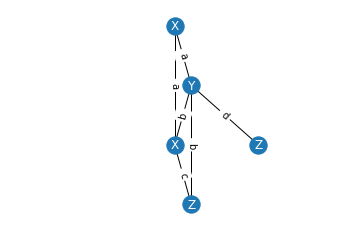

In [5]:
# Defining the graph (with labels)
G = nx.Graph()
G.add_node(0, label='X')
G.add_node(1, label='Y')
G.add_node(2, label='X')
G.add_node(3, label='Z')
G.add_node(4, label='Z')
G.add_edge(0, 1, label='a')
G.add_edge(0, 2, label='a')
G.add_edge(1, 2, label='b')
G.add_edge(1, 3, label='b')
G.add_edge(1, 4, label='d')
G.add_edge(2, 3, label='c')
pos = {0: (0., 1.), 1: (0.05, 0.75), 2: (0., 0.5), 3: (0.05, 0.25), 4: (0.25, 0.5)}  # Layout for plotting

# Plotting the graph
def plot_graph_with_labels(G, pos, ax, label_key='label'):
    # Draw nodes and edges (without labels)
    nx.draw(G, pos=pos, ax=ax) 
    # Draw node labels
    nx.draw_networkx_labels(G, pos=pos, labels={k:v for k, v in G.nodes(data=label_key)}, font_color='white') 
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={tuple(pos): v for *pos, v in G.edges(data=label_key)}, font_color='black')
    
fig, ax = plt.subplots()
ax.set_xlim([-0.5, 0.5])
plot_graph_with_labels(G, pos, ax)

In [6]:
# A couple of python tricks: 
print("1. You can get the label of a node as follows:")
print("Label for node 1: ", G.nodes[1]['label'])

print("---")
print("2. You can get the nodes and associated labels as follows:")
for n, l in G.nodes(data='label'):
    print(n, l)
    
print("---")
print("3. You can get the edge labels as follows:")
print("Label for edge (1, 3): ", G.edges[(1, 3)]['label'])

print("---")
print("4. You can get all edges and their labels as follows: ")
for i, j, l in G.edges(data='label'):
    print("Node (%d, %d) has label %s" % (i, j, l))
    
print("---")
print("5. Neighbors of a node n can be found as follows:")
neighbors = list(G.neighbors(1))
neighbors_with_labels = [(n, G.nodes[n]['label']) for n in G.neighbors(1)]
print(neighbors, neighbors_with_labels)

print("You could even define a function that sorts them")
def neighbors(G, n):
    """ Returns tuples of (node_idx, neighbor_idx, 'edge_label', 'neighbor_label')
        sorted lexicographically by labels
    """
    edges = G.edges
    nodes = G.nodes
    
    neighbors = [(n, n_, edges[(n, n_)]['label'], nodes[n_]['label']) for n_ in G.neighbors(n)]
    neighbors = sorted(neighbors, key=lambda x: tuple(x[2:]))
    return neighbors

print(neighbors(G, 1))

1. You can get the label of a node as follows:
Label for node 1:  Y
---
2. You can get the nodes and associated labels as follows:
0 X
1 Y
2 X
3 Z
4 Z
---
3. You can get the edge labels as follows:
Label for edge (1, 3):  b
---
4. You can get all edges and their labels as follows: 
Node (0, 1) has label a
Node (0, 2) has label a
Node (1, 2) has label b
Node (1, 3) has label b
Node (1, 4) has label d
Node (2, 3) has label c
---
5. Neighbors of a node n can be found as follows:
[0, 2, 3, 4] [(0, 'X'), (2, 'X'), (3, 'Z'), (4, 'Z')]
You could even define a function that sorts them
[(1, 0, 'a', 'X'), (1, 2, 'b', 'X'), (1, 3, 'b', 'Z'), (1, 4, 'd', 'Z')]


In [ ]:
def dfs(G, v):
    """
        Do a dfs for some node v and return the code for that dfs.
    """
    make_tuple = lambda fr, to: (node_idx[fr], node_idx[to], G.nodes[fr]['label'], G.edges[(fr, to)]['label'], G.nodes[to]['label'])
    code = []
    
    # TODO Do dfs traversal with respect to lexocographical order
    
    return code

def is_smaller(c1, c2):
    """
        Compare codes according to lexicographical order.
    """
    # TODO Your code here
    return False

def min_dfs_code(G):
    """
        Input:
            G:   A networkx graph.
        Output:
            dfs: A list of tuples [(i, j, L_i, L_{ij}, L_j), ...]
    """
    # Do DFS starting from each node
    code_options = [dfs(G, v) for v in G.nodes()]

    # TODO Your code here
    # Find smallest code
    # TODO Your code here
    
    return code_options[idx]

code = min_dfs_code(G)

from tabulate import tabulate
print(tabulate(code), headers=['i', 'j', 'Li', 'Lij', 'Lj'])

In [1]:
# If you don't have tabulate installed yet: 
!pip install tabulate